# Boston Dataset Normalizado

Johan Esteban Ordenes Galleguillos

RUT: 19.505.464-9

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Para revisar las potenciales correlaciones usaremos la biblioteca seaborn para crear un gráfico pairplot.

POR FAVOR DESCOMENTAR EL SIGUIENTE CÓDIGO CUANDO EJECUTE EL PROGRAMA (LO DESACTIVÉ SÓLO POR TEMAS DE TIEMPO, PORQUE DEMORA MUCHO EN GRAFICAR)

In [9]:
#sns.pairplot(bos)

La mayoría de los datos están bastante dispersos, por lo que puede que calcular una conclusión final se vea afectado por los datos iniciales. Ahora veremos como se distribuye el PRECIO y RM (promedio de habitaciones por vivienda), para tratar de sacar alguna conclusión. 
Es esperable que no se comporte de la mejor manera.

Usaremos un distplot para hacer el gráfico de la distribución.

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

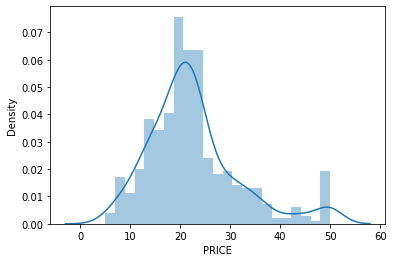

In [10]:
sns.distplot(bos['PRICE'])

<AxesSubplot:ylabel='Density'>

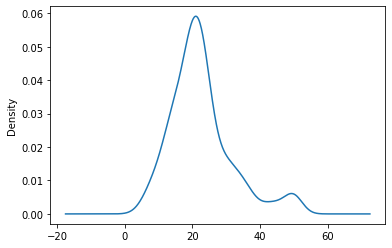

In [11]:
bos['PRICE'].plot(kind='kde')

<AxesSubplot:xlabel='RM', ylabel='Density'>

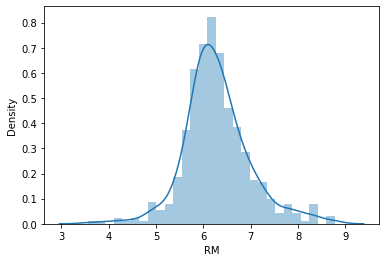

In [12]:
sns.distplot(bos['RM'])

<AxesSubplot:ylabel='Density'>

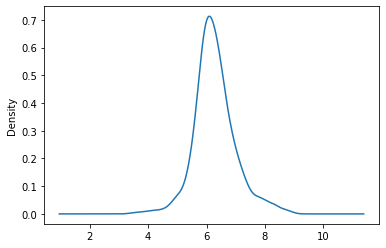

In [13]:
bos['RM'].plot(kind='kde')

Mirando las distribuciones anteriores, las que tienen más correlacion es RM (Numero de casas por vivienda) y PRICE (Precio). En este caso, lo más logico sería predecir el precio con respecto a los demás datos, porque es lo que más le interesa a las personas, de nada tiene sentido predecir valores según la cantidad de casas en Boston, por ende escogeremos el precio como modelo a predecir más adelante.

También utilizamos el Heatmap para ver si existe alguna otra correlación de forma más simple rápida.

<AxesSubplot:>

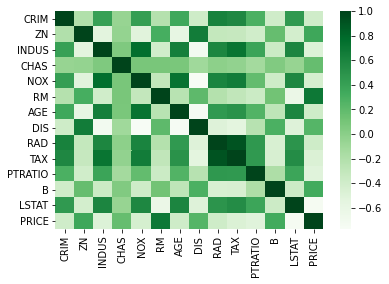

In [14]:
sns.heatmap(bos.corr(), cmap="Greens")

Como resultado, se ve bastante poca correlación en los datos, visualmente no pasando a más de 0.6 aproximadamente con todas las variables revisadas. Quizás sea posible que un modelo lineal con las 13 variables sea capaz de predecir el precio, aunque no será muy certero.

Para entrenar el modelo de regresión lineal, se crea el X y el Y de la función Y = wX + b. La variable Y será precio. Las variables X serán el resto menos, aquí todas las columnas pueden ser utilizadas dado que todas son de tipo numérico.

Arreglos de X e Y:

In [15]:
X = bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = bos['PRICE']

#X = bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'PRICE', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
#y = bos['RM']

Separamos los datos de entrenamiento, validación y test.
- Tomamos 60% de los datos para entrenamiento
- Tomamos 40% de los datos para testeo
- Controlamos la mezcla (random_state) aplicada a los datos antes de la división. Reproducimos 101 veces el mismo conjunto de puntos de datos de prueba y entrenamiento, cada vez que se realiza una división.


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101) 

Creamos y entrenamos el modelo

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Luego de crear el modelo, la variable "lm" ahora tiene el modelo entrenado. Este será suficiente revisarlo, ver los coeficientes y calcular qué tan bueno es prediciendo los precios.

Evaluamos el modelo revisando el b de la función y = wX + b

In [18]:
print(lm.intercept_)

41.281496544738324


Y para los coeficientes de w:

In [19]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


Interpretando los coeficientes:

        - CRIM     Crimen per cápita por ciudad
        - ZN       Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
        - INDUS    Proporción de acres comerciales no minoristas por ciudad
        - CHAS     Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
        - NOX      Concentración de óxidos nítricos (partes por 10 millones)
        - RM       Número medio de habitaciones por vivienda
        - AGE      Proporción de edad de las unidades ocupadas por el propietario construidas antes de 1940
        - DIS      Distancias ponderadas a cinco centros de empleo de Boston
        - RAD      Índice de accesibilidad a carreteras radiales
        - TAX      Tasa de impuesto a la propiedad de valor total por $ 10,000
        - PTRATIO  Proporción alumno-profesor por municipio
        - B        B 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
        - LSTAT    % de status menor de la población
        - MEDV     Valor medio de las viviendas ocupadas por sus propietarios en $ 1000's

- Manteniendo todo fijo y aumentando 1 unidad de CRIM lo asociaremos a un decremento de -$0.07
- Manteniendo todo fijo y aumentando 1 unidad de ZN lo asociaremos a un incremento de $0.04
- Manteniendo todo fijo y aumentando 1 unidad de INDUS lo asociaremos a un incremento de $0.09
- Manteniendo todo fijo y aumentando 1 unidad de CHAS lo asociaremos a un incremento de $4.13
- Manteniendo todo fijo y aumentando 1 unidad de NOX lo asociaremos a un decremento de -$19.97
- Manteniendo todo fijo y aumentando 1 unidad de RM lo asociaremos a un incremento de $2.89
- Manteniendo todo fijo y aumentando 1 unidad de AGE lo asociaremos a un incremento de $0.01
- Manteniendo todo fijo y aumentando 1 unidad de DIS lo asociaremos a un decremento de -$1.26
- Manteniendo todo fijo y aumentando 1 unidad de RAD lo asociaremos a un incremento de $0.26
- Manteniendo todo fijo y aumentando 1 unidad de TAX lo asociaremos a un decremento de -$0.01
- Manteniendo todo fijo y aumentando 1 unidad de PTRATIO lo asociaremos a un decremento de -$0.88
- Manteniendo todo fijo y aumentando 1 unidad de B lo asociaremos a un incremento de $0.007
- Manteniendo todo fijo y aumentando 1 unidad de LSTAT lo asociaremos a un decremento de -$0.64

Probablemente los datos no tengan sentido porque es un dataset explícitamente creado para probar la regresión.

Luego aplicamos predicciones para el modelo creado anteriormente.

In [20]:
predictions = lm.predict(X_test)

Para revisar, crearemos un scatter de los valores de Y de test y las predicciones. Idealmente obtendremos una recta de pendiente 1 e intersección 0

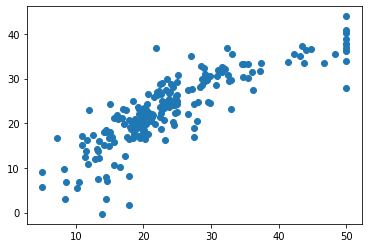

In [21]:
plt.scatter(y_test,predictions)

Ahora crearemos un histograma de los datos residuales. Idealmente nuestro gráfico debe estar normalmente distribuido cerca del centro. En caso de que encontremos anomalías o que la distribución se encuentre cargada es probable que el modelo tenga variables no consideradas o que algunas variables sean "colineales".

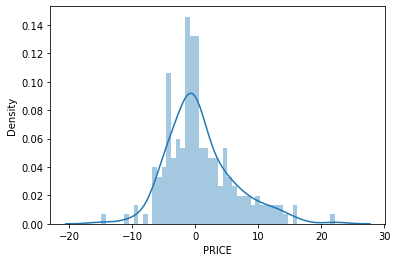

In [22]:
sns.distplot((y_test-predictions),bins=50);

Esta es una forma genérica y sencilla de evaluar los residuales.

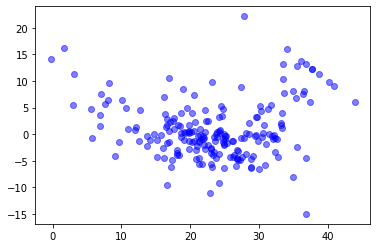

In [23]:
plt.scatter(predictions,y_test-predictions,c='blue',alpha=0.5)

Evaluamos los modelos de regresión

MAE: Media de los valores absolutos de los errores

MSE: Media del cuadrado de los errores:

RMSE: Raiz de la media del cuadrado de los errores

Comparando las métricas tenemos:

MAE es el más simple de entender, es el error promedio.
MSE es más popular y útil en el mundo real porque castiga grandes errores.
RMSE es el mas popular porque el error puede ser interpretado en unidades de "Y".

Todas son funciones son sin pérdida, porque el objetivo es minimizarlas. Luego las calculamos con sklearn:

In [24]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.9051448026275097
MSE: 29.41636546745284
RMSE: 5.423685598138303


Y el R^2:

In [25]:
metrics.r2_score(y_test,predictions)

0.6996069461015082

Alcanzando un R^2 de casi un 70% diría que es un resultado regular, pero tampoco tan bueno. La verdad esto se puede ver afectado por el datasheet (506 datos), dado que no se puede predecir correctamente con poca cantidad de datos. También esto pudo haber sido por el año en que se publicaron los datos (1978), en los que no se contaba con grandes cantidades de datos. Además los datos tenían muy poca correlación entre sí, por lo que aparentemente no es posible hacer predicciones un poco más correctas y exactas con los datos recopilados.

Anteriormente hice la prueba con los datos para medir RM también, pero el R^2 no superaba el 59%, y por ende, se ajustaba menos el modelo a los datos y no tenía sentido tampoco predecir con respecto a la cantidad de habitaciones por vivienda. 

Finalmente según el modelo entrenado, estos son los principales indicadores que hacen disminuir el precio de las viviendas en la ciudad de Boston.

        - CRIM     Crimen per cápita por ciudad
        - NOX      Concentración de óxidos nítricos (partes por 10 millones)
        - DIS      Distancias ponderadas a cinco centros de empleo de Boston
        - TAX      Tasa de impuesto a la propiedad de valor total por $ 10,000
        - PTRATIO  Proporción alumno-profesor por municipio
        - LSTAT    % de menor status de la población (% 1/2 de adultos sin alguna educación secundaria y proporción de trabajadores varones clasificados como jornaleros)



Primero que todo partiremos definiendo el modelo de regresión Ridge (También conocida como L1), Lasso (También conocida como L2) y ElasticNet

In [26]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

def train_model(type="ridge", normalized=True, alphas=0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    model_type = None
    if(type=="ridge"):
        model_type = Ridge(alpha = alphas, normalize = normalized)
    elif(type=="lasso"):
        model_type = Lasso(alpha = alphas, normalize = normalized)
    elif(type=="elastic_net"):
        model_type = ElasticNet(alpha = alphas, normalize = normalized)
    model_type.fit(X_train, y_train)
    prediction = model_type.predict(X_test)
    model_type.score(X_test, y_test)
    print('alpha:', alphas, 'score:', model_type.score(X_test, y_test))
    return model_type


Definimos los 3 valores de alpha

In [27]:
alpha_1 = 0.05
alpha_2 = 0.2
alpha_3 = 0.5

Regresión Ridge no normalizada

In [28]:
ridge_1sn = train_model(type="ridge", normalized=False, alphas=alpha_1)
ridge_2sn = train_model(type="ridge", normalized=False, alphas=alpha_2)
ridge_3sn = train_model(type="ridge", normalized=False, alphas=alpha_3)

alpha: 0.05 score: 0.7107710601788513
alpha: 0.2 score: 0.7094332438294526
alpha: 0.5 score: 0.7070756189146229


Regresión Ridge normalizada

In [29]:
ridge_1n = train_model(type="ridge", normalized=True, alphas=alpha_1)
ridge_2n = train_model(type="ridge", normalized=True, alphas=alpha_2)
ridge_3n = train_model(type="ridge", normalized=True, alphas=alpha_3)

alpha: 0.05 score: 0.7046934618201214
alpha: 0.2 score: 0.6911332222239877
alpha: 0.5 score: 0.6658827571518844


Cross validation

Iniciamos definiendo el modelo de cross validation para evaluar los resultados del análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba:

In [30]:
from sklearn.model_selection import cross_val_score

def cross_valid(model_type, alpha):
    cv_results = cross_val_score(model_type, X, y, cv = 5)
    print('alpha:', alpha, 'results:', cv_results, np.mean(cv_results))

Cross validation con Ridge para los distintos valores de alpha

In [31]:
print('Sin normalizar:')
cross_valid(ridge_1sn, alpha_1)
cross_valid(ridge_2sn, alpha_2)
cross_valid(ridge_3sn, alpha_3)

print('\nNormalizados:')
cross_valid(ridge_1n, alpha_1)
cross_valid(ridge_2n, alpha_2)
cross_valid(ridge_3n, alpha_3)

Sin normalizar:
alpha: 0.05 results: [ 0.64133414  0.71907103  0.59121566  0.07957927 -0.2443255 ] 0.3573749199290459
alpha: 0.2 results: [ 0.64665127  0.72921872  0.60159278  0.08053405 -0.22350945] 0.3668974726327908
alpha: 0.5 results: [ 0.65396061  0.7376933   0.61575496  0.08229432 -0.19607739] 0.37872515849325317

Normalizados:
alpha: 0.05 results: [ 0.69370888  0.74234389  0.59156103  0.12918258 -0.04023223] 0.42331283095686806
alpha: 0.2 results: [0.71903107 0.73599491 0.55993082 0.20290569 0.17256817] 0.47808613309027004
alpha: 0.5 results: [0.66758848 0.69340446 0.47352712 0.24855188 0.29564884] 0.4757441553643673


Utilizando la misma función anterior ahora vamos a buscar los modelos con Regresión Lasso.

Regresión Lasso no normalizada:

In [32]:
lasso_1sn = train_model(type="lasso", normalized=False, alphas=alpha_1)
lasso_2sn = train_model(type="lasso", normalized=False, alphas=alpha_2)
lasso_3sn = train_model(type="lasso", normalized=False, alphas=alpha_3)

alpha: 0.05 score: 0.6916678628681787
alpha: 0.2 score: 0.689876740203904
alpha: 0.5 score: 0.6839304998714224


Regresión Lasso normalizada:

In [33]:
lasso_1n = train_model(type="lasso", normalized=True, alphas=alpha_1)
lasso_2n = train_model(type="lasso", normalized=True, alphas=alpha_2)
lasso_3n = train_model(type="lasso", normalized=True, alphas=alpha_3)

alpha: 0.05 score: 0.6463814725788672
alpha: 0.2 score: 0.4288599123744583
alpha: 0.5 score: -0.03469753992352409


In [34]:
chart = pd.DataFrame({'variable': X.columns, 'lasso_coef': lasso_1sn.coef_})
chart

,variable,lasso_coef
0,CRIM,-0.122578
1,ZN,0.038140
2,INDUS,-0.008011
3,CHAS,2.240974
4,NOX,-0.000000
5,RM,4.020012
6,AGE,-0.022170
7,DIS,-1.128522
8,RAD,0.209715
9,TAX,-0.010247


Vemos los coeficientes y visualizarlos. En este caso para Lasso con alpha = 0.05, ningún coeficiente se elimina dado que no está normalizada.

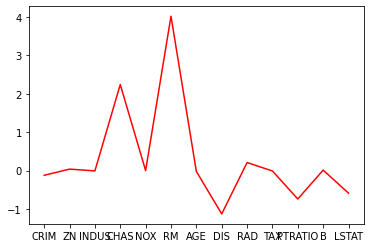

In [35]:
plt.plot(chart.variable, chart.lasso_coef,"r")

In [36]:
chart = pd.DataFrame({'variable': X.columns, 'lasso_coef': lasso_1n.coef_})
chart

,variable,lasso_coef
0,CRIM,-0.002644
1,ZN,0.000000
2,INDUS,-0.000000
3,CHAS,1.047540
4,NOX,-0.000000
5,RM,3.846012
6,AGE,-0.000000
7,DIS,-0.000000
8,RAD,-0.000000
9,TAX,-0.000000


Vemos los coeficientes y visualizarlos. En este caso para Lasso con alpha = 0.05, como está normalizado (y comparandolo con el gráfico anterior) los coeficientes CRIM, ZN, DIS, TAX tienden a cero y a eliminarse, como se ve en el siguiente gráfico:

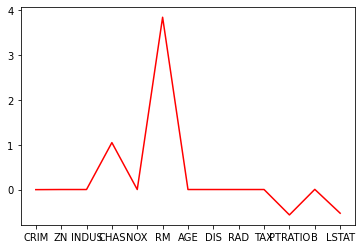

In [37]:
plt.plot(chart.variable, chart.lasso_coef,"r")

Cross validation con Lasso:

In [38]:
print('Sin normalizar:')
cross_valid(lasso_1sn, alpha_1)
cross_valid(lasso_2sn, alpha_2)
cross_valid(lasso_3sn, alpha_3)

print('\nNormalizados:')
cross_valid(lasso_1n, alpha_1)
cross_valid(lasso_2n, alpha_2)
cross_valid(lasso_3n, alpha_3)

Sin normalizar:
alpha: 0.05 results: [ 0.67030077  0.73161327  0.64327484  0.07629505 -0.12718761] 0.39885926511516684
alpha: 0.2 results: [ 0.66717727  0.72971546  0.59261311  0.13537128 -0.07215411] 0.41054459963510437
alpha: 0.5 results: [0.6390239  0.69690872 0.47244623 0.23388165 0.10999143] 0.4304503842552164

Normalizados:
alpha: 0.05 results: [ 0.72314916  0.67888489  0.32038434  0.15946204 -0.21655885] 0.33306431616367793
alpha: 0.2 results: [ 0.49824625  0.32745089 -0.52046607  0.19246689 -1.24938743] -0.15033789526979918
alpha: 0.5 results: [-7.89365407e-04 -6.11824748e-02 -1.00259580e+00 -1.10799388e-01
 -2.42941156e+00] -0.7209557183189366


Regresión con ElasticNet con datos sin normalizar:

In [39]:
elastic_net_1sn = train_model(type="elastic_net", normalized=False, alphas=alpha_1)
elastic_net_2sn = train_model(type="elastic_net", normalized=False, alphas=alpha_2)
elastic_net_3sn = train_model(type="elastic_net", normalized=False, alphas=alpha_3)

alpha: 0.05 score: 0.6939158373225277
alpha: 0.2 score: 0.6898061491587852
alpha: 0.5 score: 0.678098928701476


Regresión ElasticNet con datos normalizados:

In [40]:
elastic_net_1n = train_model(type="elastic_net", normalized=True, alphas=alpha_1)
elastic_net_2n = train_model(type="elastic_net", normalized=True, alphas=alpha_2)
elastic_net_3n = train_model(type="elastic_net", normalized=True, alphas=alpha_3)

alpha: 0.05 score: 0.2895767269054589
alpha: 0.2 score: 0.04808284796538975
alpha: 0.5 score: -0.027239402257044354


Conclusión

El problema de utilizar alphas muy elevados es que perdemos los datos de los coeficientes al normalizar, pero nos dá un claro para poder analizar mucho mejor los datos, pero a la vez perdiendo un poco de precision visualizándolos processo de cross-validation en donde el valor promedio es mayor en una regresión sin normalizar. Mientras más alto sea el valor de alpha al normalizar, el valor score tiende a ser negativo, pero se descarta para el análisis posterior ya que sus coeficientes van a ser ceros. En este caso para este ejercicio los datos del score desde 0.2 hacia arriba tienden a ser muy parecidos, lo cual podemos deducir que no habrá mucha diferencia al normalizar.

